# Pandas

In [2]:
import pandas as pd

df = pd.read_csv('./Data/ACS_16_5YR_B24011_with_ann.csv', usecols=['GEO.id', 'GEO.id2'], encoding='latin-1')
# df = df.drop(0)
df.head(2)

# excel sheet names
workbook = pd.ExcelFile('./Data/Yelp_Selected_Businesses.xlsx')
workbook.sheet_names

# save results
# df.to_csv('NewSavedView.csv', index=False) #Notice how we have to pass index=False if we do not want it included in our output

# supress scientific notation
# pd.set_option('display.float_format', lambda x: '%.3f' % x)

# max rows / columns
# pd.options.display.max_rows = 99999
# pd.options.display.max_columns = 99999

['Biz_id_RESDU',
 'Biz_id_4JNXU',
 'Biz_id_YJ8lj',
 'Biz_id_ujHia',
 'Biz_id_na4Th']

In [4]:
# apply a function
df = pd.read_csv('./Data/turnstile_180901.txt')
def contains_n(text):
    return 'N' in text

df['On_N_Line'] = df.LINENAME.map(contains_n)
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,On_N_Line
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184,True
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188,True
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229,True
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314,True
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384,True


In [5]:
df = pd.read_csv('./Data/turnstile_180901.txt')

# change column data types
df.ENTRIES = df.ENTRIES.astype(int)
df.ENTRIES.dtype

# dates
# iloc slicing series / dataframes
print(df.DATE.iloc[0])
# pd.to_datetime(df.DATE, format='%m/%d/%Y').head()
pd.to_datetime(df.DATE).head()
# dt methods
df.DATE = pd.to_datetime(df.DATE)
df.DATE.dt.day_name().head()

# rename / drop columns, set new index
df = df.rename(columns = {'DATE': 'date'})
df.columns = [col.title().strip() for col in df.columns]
# df = df.drop('C/A', axis = 1) # If you don't pass the axis=1 parameter, pandas will try and drop a row with the specified index
# df = df.set_index('UNIT')
# df = df.reset_index()
df.head()

df.Date = pd.to_datetime(df.Date)
df['Dayofweek'] = df.Date.dt.dayofweek
grouped = df.groupby('Dayofweek').sum()
display(grouped.plot(kind = 'barh'))
grouped = grouped.reset_index()
grouped

grouped['IsWeekend'] = grouped.Dayofweek.map({0:False,1:False,2:False,3:False,4:False,5:True,6:True})
wkend = grouped.groupby('IsWeekend').mean()
display(wkend)
wkend[['Entries', 'Exits']].plot(kind='barh')

08/25/2018


,Dayofweek,Entries,Exits
IsWeekend,,,
False,2.0,4.763695e+10,4.489587e+10
True,5.5,4.758893e+10,4.485423e+10


## Accessing Data

In [6]:
# dataframes

df.head()
df.tail()
# df.info()
df.index
df.dtypes
df.columns
df.shape

df.iloc[5:80, 2:10] # integer-location based indexing
# df.loc[:, 'Linename'] # label-location based indexing
# or
df['Linename']
# boolean indexing
display(df.loc[(df['Entries'] > 7740888) & (df['Exits'] > 1367254), ['Station', 'Entries', 'Exits']][0:10])

# update values
df.loc[df['Entries'] > 7740888, ['Station']] = 'Station4'

# create new column
# df.loc[df['Entries'] > 7740888, 'NewCol'] = 'Busy'

,Station,Entries,Exits
295,59 ST,10964211,1367258
296,59 ST,10964268,1367261
297,59 ST,10964438,1367285
298,59 ST,10964772,1367303
299,59 ST,10965307,1367311
300,59 ST,10965692,1367317
301,59 ST,10965767,1367318
302,59 ST,10965821,1367321
303,59 ST,10966055,1367336
304,59 ST,10966439,1367348


In [7]:
# series

linenames = df['Linename']
linenames.unique()
linenames.nunique()

6

## Statistical Methods

In [8]:
df.describe()
df.mean()
df['Entries'].mean()
df['Entries'].quantile(.9) # get the value for 90% quantile for a specific column
df['Entries'].count()
df['Entries'].std()
df['Entries'].sum()
# pd.options.display.max_rows = 99999
# display(df['Entries'].cumsum()) # the cumulative sum, where each cell index contains the sum of all indices lower than, and including, itself
df['Station'].unique()
df['Station'].value_counts()

Station4           1435
49 ST               759
5 AV/59 ST          468
23 ST               426
59 ST               420
28 ST               382
TIMES SQ-42 ST      308
57 ST-7 AV          291
14 ST-UNION SQ      192
34 ST-HERALD SQ     167
Name: Station, dtype: int64

## .apply() / .applymap()

In [9]:
# convert every value in the DataFrame to a string
string_df = df.applymap(lambda x: str(x))
string_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4848 entries, 0 to 4847
Data columns (total 12 columns):
C/A          4848 non-null object
Unit         4848 non-null object
Scp          4848 non-null object
Station      4848 non-null object
Linename     4848 non-null object
Division     4848 non-null object
Date         4848 non-null object
Time         4848 non-null object
Desc         4848 non-null object
Entries      4848 non-null object
Exits        4848 non-null object
Dayofweek    4848 non-null object
dtypes: object(12)
memory usage: 454.6+ KB


In [10]:
df['Entries'].apply(lambda x: x+1)[0:1]

0    6736068
Name: Entries, dtype: int64

## Data Visualization with Pandas

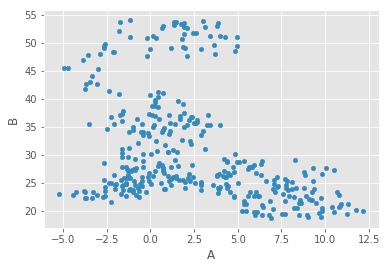

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# %matplotlib notebook

plt.style.use('ggplot')

np.random.seed(777)

data = pd.DataFrame({'A':np.random.randn(365).cumsum(),
                    'B':np.random.randn(365).cumsum() + 25,
                    'C':np.random.randn(365).cumsum() - 25}, 
                     index = pd.date_range('1/1/2018', periods = 365))

# ; removes the '<matplotlib.axes._subplots.AxesSubplot at 0x8985400>' after the chart
data.plot('A', 'B', kind = 'SCATTER');

Text(0.5, 1.0, 'Manipulating Pandas plot objects in matplotlib')

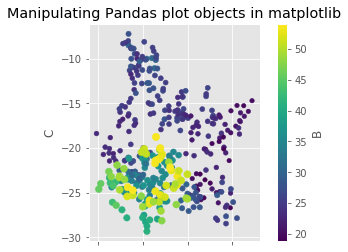

In [12]:
# colormaps: https://matplotlib.org/examples/color/colormaps_reference.html
ax = data.plot.scatter('A', 'C', c = 'B', s = data['B'], colormap = 'viridis');
# setting the aspect ratio to equal allows the viewer to easily see that the range of series A is much smaller than series C
ax.set_aspect('equal')
ax.set_title('Manipulating Pandas plot objects in matplotlib')

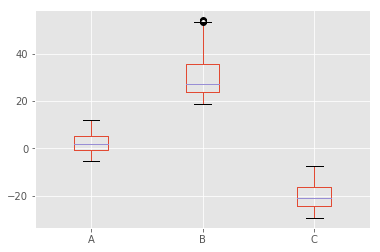

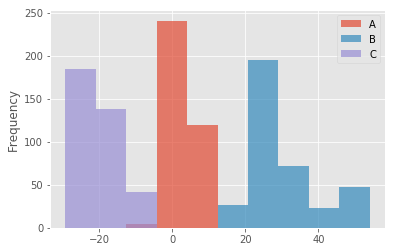

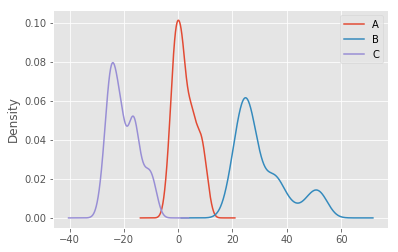

In [13]:
data.plot.box();
data.plot.hist(alpha = 0.7); # setting alpha level to inspect distribution overlap
data.plot.kde();

### Visualizing High Dimensional Data
#### Scatter Matrix / Parallel Plots

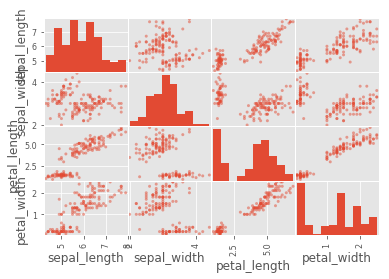

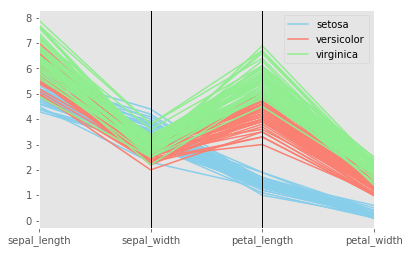

In [15]:
iris = pd.read_csv('./Data/iris.csv')

# Scatter Matrix
pd.plotting.scatter_matrix(iris);

colormap = ('skyblue', 'salmon', 'lightgreen')
plt.figure()
# Parallel Plots
pd.plotting.parallel_coordinates(iris, 'species', color = colormap);

## Pivot Tables with Pandas

In [16]:
df = pd.read_csv('./Data/causes_of_death.tsv', sep='\t')
grouped = df.groupby(['State', 'Gender'])['Deaths', 'Population'].agg(['mean', 'min', 'max', 'std'])
grouped.head()

Deaths                          
                        mean min     max           std
State   Gender                                        
Alabama Female  10753.325000  10  116297  24612.250487
        Male    10503.585366  10   88930  20620.218089
Alaska  Female    679.975000  13    4727   1154.870455
        Male      860.357143  12    5185   1411.777392
Arizona Female   8800.622222  21  133923  25979.871632

Gender,Female,Male
State,,
Alabama,10753.325000,10503.585366
Alaska,679.975000,860.357143
Arizona,8800.622222,9405.659574
Arkansas,6621.615385,6301.690476
California,45233.297872,46406.297872


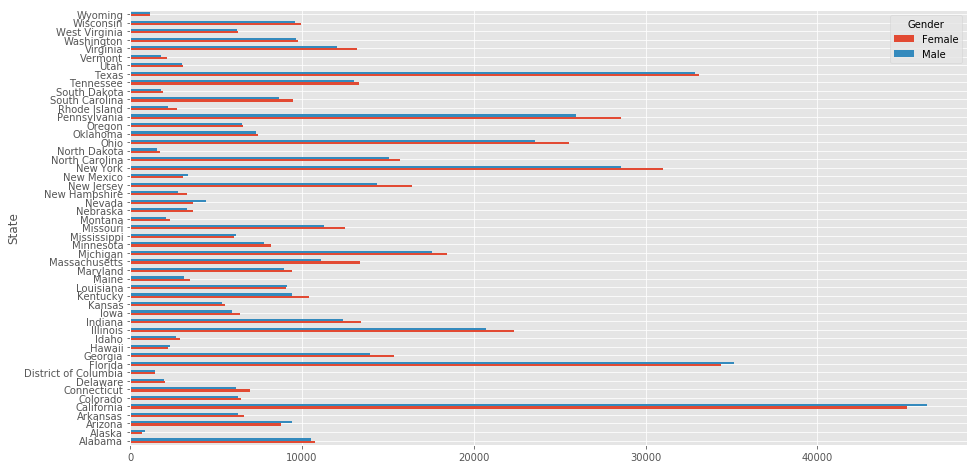

In [17]:
grouped = grouped.reset_index()
cols0 = grouped.columns.get_level_values(0)
cols1 = grouped.columns.get_level_values(1)
grouped.columns = [col0 + '_' + col1 if col1 != '' else col0 for col0, col1 in list(zip(cols0, cols1))]
pivot = grouped.pivot(index='State', columns='Gender', values='Deaths_mean')
display(pivot.head())
pivot.plot(kind='barh', figsize=(15, 8))

# Data Cleansing
## Dealing with Missing Data
Strategies:
- Remove Data (Rows / Columns): **.dropna()**
- Replace
  - Continuous Data: Best to replace with the median: **.fillna()**
  - Categorical Data: Most common value?
- Keep
  - Continuous Data: **Coarse Classification (Binning)** Separate by categories (i.e. age range) and create a new category
  - Categorical Data: Replace with a string 'NaN' / 'missing'